In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/Sophie/Documents/GitHub/Analysis_and_Modelling_Social_Interactions'

In [20]:
os.chdir("/Users/leonidgavrilyuk/Desktop/Semester_3/AMS/")
os.getcwd()

'/Users/leonidgavrilyuk/Desktop/Semester_3/AMS'

## Load data

In [4]:
df = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name = '2018')
df.head()

,Origin_Country,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,Albania,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,880.0,0.0,0.0,0.0,0.0
1,Austria,AT,0.0,NaN,0.0,0.0,0.0,5595,112.0,4079.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0
2,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0
3,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,...,1776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1213.0,2305.0,0.0,0.0,0.0,2058.0


In [5]:
df_elec = df.drop(['Origin_Country'], axis=1)
df_elec.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,880.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5595,112.0,4079.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,1776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1213.0,2305.0,0.0,0.0,0.0,2058.0


## Sort and clean up data

In [6]:
# Convert the wide table to a long table
Country_list = list(df_elec.columns)
df_elec = df_elec.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec.head()

,Origin,Destination,Electricity_Flow
0,AL,AL,NaN
1,AT,AL,0.0
2,BA,AL,0.0
3,BE,AL,0.0
4,BG,AL,0.0


In [7]:
# Sort the table based on origin country's name
df_elec.sort_values('Origin', inplace=True, ascending=True)
df_elec.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec = df_elec[df_elec.Electricity_Flow != 0]
df_elec.head()

,Origin,Destination,Electricity_Flow
12,AL,GR,1061.0
20,AL,ME,742.0
27,AL,RS,880.0
39,AT,SI,4096.0
40,AT,DE,4079.0


In [8]:
# test = df_elec.set_index(['Origin', 'Destination', 'Electricity_Flow'])
# edges = test.index.tolist()
# edges

## Create the network

In [9]:
# trial - network with nodes without weights
df_elec_country = df_elec[['Origin', 'Destination']]
df_elec_country.head()

G = nx.DiGraph()
G = nx.from_pandas_edgelist(df_elec_country, 'Origin', 'Destination')

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Text(0.5, 1.0, 'Shell network graph, 2014')

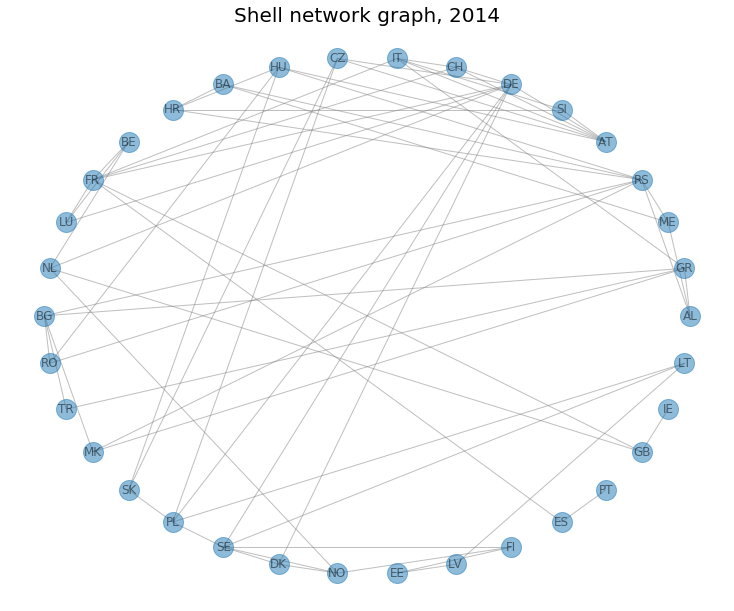

In [10]:
from matplotlib.pyplot import figure


figure(figsize=(10,8))
nx.draw_shell(G, node_size=400, alpha=0.5, edge_color='gray', style = "solid", width=1, with_labels=True)
plt.title('Shell network graph, 2014', fontsize=20)
#plt.savefig('Shell_graph_2014.png', dpi=1000)

In [20]:
import numpy as np
df_export = df_elec.groupby(['Origin'], as_index=False).sum()
df_export


,Origin,Electricity_Flow
0,AL,2683.0
1,AT,19057.0
2,BA,7697.0
3,BE,4313.0
4,BG,10029.0
5,CH,31694.0
6,CZ,25459.0
7,DE,82674.0
8,DK,10413.0
9,EE,4136.0


In [21]:
total_export = np.asarray(df_export['Electricity_Flow'])
total_export

array([ 2683., 19057.,  7697.,  4313., 10029., 31694., 25459., 82674.,
       10413.,  4136.,  9129.,  3459., 75789.,  2189.,  2265.,  6533.,
        4260.,  1643.,  2638.,  2560.,  1349.,  4269.,  3011.,  2224.,
       18597., 17954.,  8111.,  8324.,  4921.,  6703., 31562.,  9320.,
        6949.,  3001.])

Text(0.5, 1.0, 'Directed network graph, 2014')

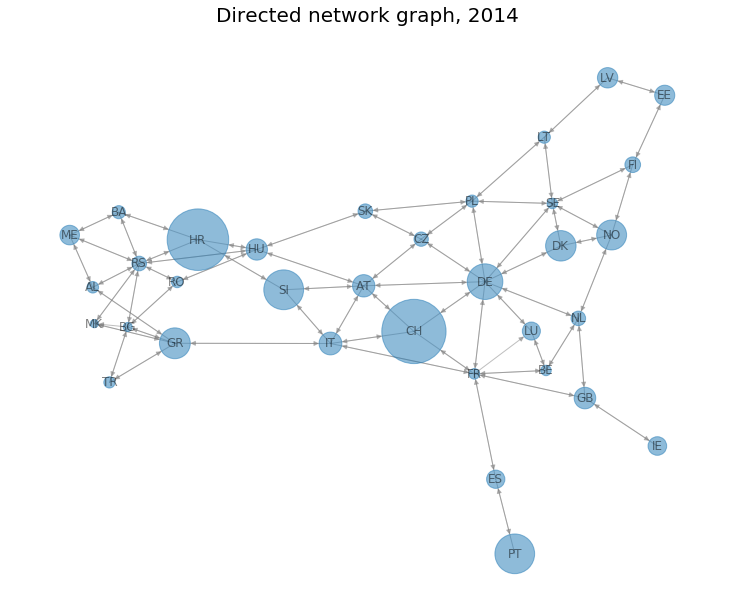

In [17]:
G2 = nx.DiGraph()
G2 = nx.from_pandas_edgelist(df_elec, source='Origin', target='Destination', create_using=nx.DiGraph())
figure(figsize=(10,8))
d = dict(G2.degree)
pos = nx.spring_layout(G2, scale = 2)
nx.draw(G2, pos, node_size=total_export/20, alpha=0.5, edge_color='gray', style = "solid", width=1, with_labels=True)
plt.title('Directed network graph, 2014', fontsize=20)
#plt.savefig('DiGraph_2014.png', dpi=1000)

### Number of connections 

In [89]:
leaderboard = {}
for x in G2.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)
df2.head(10)

,connections
RS,8
DE,8
FR,7
AT,6
BG,5
IT,5
GR,5
SE,5
HU,5
CZ,4


In [72]:
G3 = nx.DiGraph()
G3 = G3.add_weighted_edges_from(edges)

figure(figsize=(10,8))
nx.draw(G3, with_labels=True)

TypeError: 'LineCollection' object is not iterable

In [13]:
net_elec = nx.from_pandas_adjacency(df, create_using=nx.DiGraph())

NetworkXError: ('Columns must match Indices.', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] not in columns')

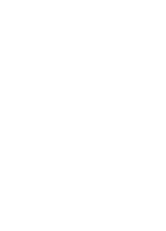

In [12]:
plt.subplot(121)
nx.draw(net_elec, with_labels=True, font_weight='bold')